# Analisis de Datos

Este notebook esta hecho para anlizar los datos opbtenidos, su completitud, organizacion y demas

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [51]:
path_file = "modismos_Dataset_Final.csv"

df = pd.read_csv(path_file, sep=";")
df

,modismo,significado,ejemplo,fuente
0,abajeño,Propio o nativo de las costas o de las tierras...,Empezaron cultivos de tabaco y a elaborar un d...,DICOL
1,abalear,Disparar a alguien o a algo de manera repetida...,El funcionario resultó ileso a pesar de que el...,DICOL
2,abalear,Herir o matar a alguien con disparos de un arm...,Limpiaba la hojarasca cuando hombres armados l...,DICOL
3,abaleo,Situación en la que hay disparos repetidos que...,Por la calle doce se oía un tremendo abaleo y ...,DICOL
4,abanicar,"En el beisbol, fallar el bateador al no tocar ...",El bateador se ponchó abanicando el tercer lan...,DICOL
...,...,...,...,...
10190,ñero,indigente que vive en la calle,NaN,BDC
10191,ñoco,"muñón, parte que queda de algunos objetos larg...",NaN,BDC
10192,ñoco,cuchillo muy desgastado,entre una manca y un manco/hicieron un alborot...,BDC
10193,ñola,excremento,NaN,BDC


In [52]:
df.isnull().sum()

modismo           0
significado       0
ejemplo        3855
fuente            0
dtype: int64

Acá podemos ver la parte de nuestros datos que carece de ejemplos. Por suerte, poseemos las definiciones de las palabras y en un futuro podran completarse esos ejemplos con el uso de un LLM

## Analisis de Cantidad de Modismos por Fuente

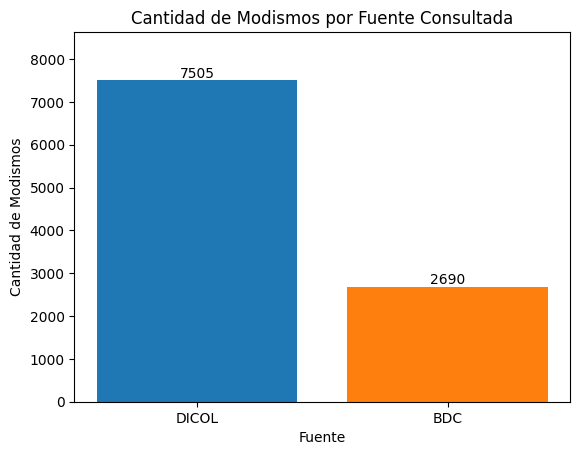

In [53]:
source_counts = df["fuente"].value_counts()

bars = plt.bar(source_counts.index, source_counts.values, color=['#1f77b4', '#ff7f0e'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.title("Cantidad de Modismos por Fuente Consultada")
plt.xlabel("Fuente")
plt.ylabel("Cantidad de Modismos")

# Ajustar el límite del eje Y para dar espacio a los números
plt.ylim(0, source_counts.max() * 1.15)

plt.show()

## Cantidad de Registros con Ejemplos y Sin Ejemplos

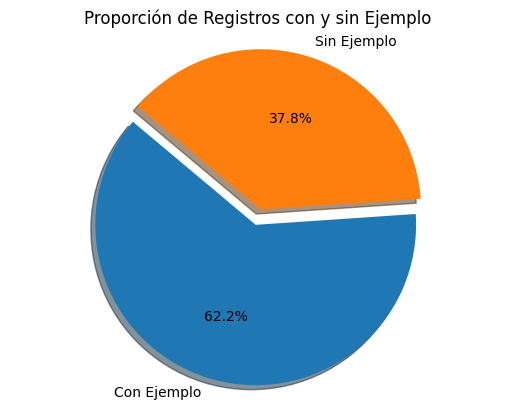

In [54]:
con_ejemplo = df['ejemplo'].notnull().sum()
sin_ejemplo = df['ejemplo'].isnull().sum()

# Datos para el pie chart
labels = ['Con Ejemplo', 'Sin Ejemplo']
sizes = [con_ejemplo, sin_ejemplo]
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Proporción de Registros con y sin Ejemplo')
plt.axis('equal')
plt.show()

## Cantidad de Registros con Más de un significado

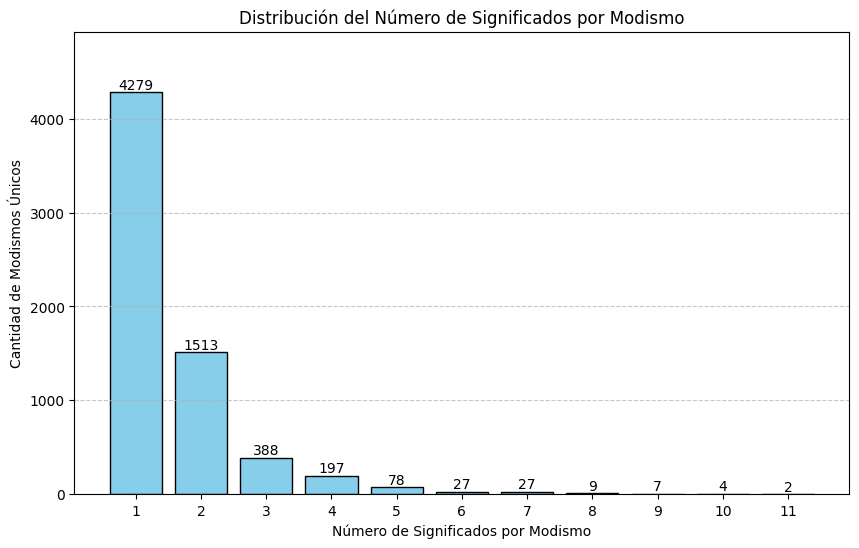

In [55]:
# Contar cuántos significados tiene cada modismo único
meaning_counts_per_idiom = df.groupby('modismo').size()

# Contar cuántos modismos tienen 1, 2, 3, etc., significados
distribution_of_meanings = meaning_counts_per_idiom.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(distribution_of_meanings.index.astype(str), distribution_of_meanings.values, color='skyblue', edgecolor='black')

# Añadir números encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

# Títulos y etiquetas
plt.title('Distribución del Número de Significados por Modismo')
plt.xlabel('Número de Significados por Modismo')
plt.ylabel('Cantidad de Modismos Únicos')
plt.ylim(0, distribution_of_meanings.max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [64]:
meaning_counts_per_idiom[meaning_counts_per_idiom >= 10]

modismo
agua      11
chucha    10
cuento    10
lengua    10
mano      10
pelo      11
dtype: int64

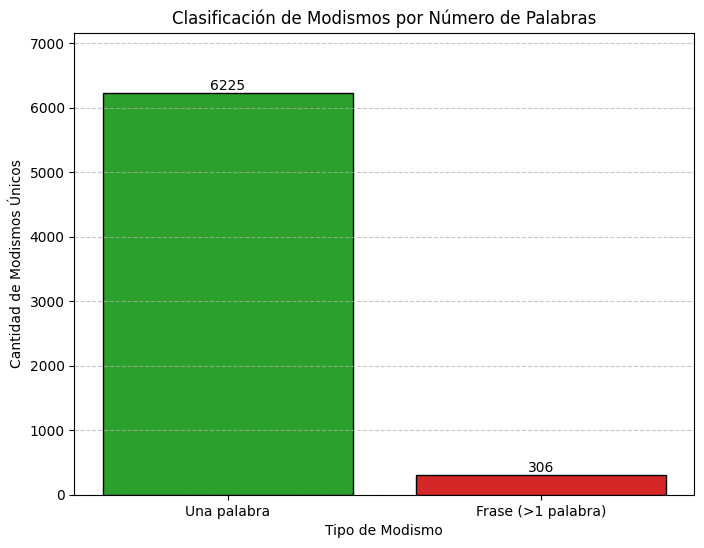

In [56]:
# Obtener una lista de modismos únicos
unique_idioms = df['modismo'].unique()

# Clasificar cada modismo único
is_phrase = ['Frase (>1 palabra)' if ' ' in idiom else 'Una palabra' for idiom in unique_idioms]

# Contar las categorías
word_count_series = pd.Series(is_phrase).value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(word_count_series.index, word_count_series.values, color=['#2ca02c', '#d62728'], edgecolor='black')

# Añadir números encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

# Títulos y etiquetas
plt.title('Clasificación de Modismos por Número de Palabras')
plt.xlabel('Tipo de Modismo')
plt.ylabel('Cantidad de Modismos Únicos')
plt.ylim(0, word_count_series.max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

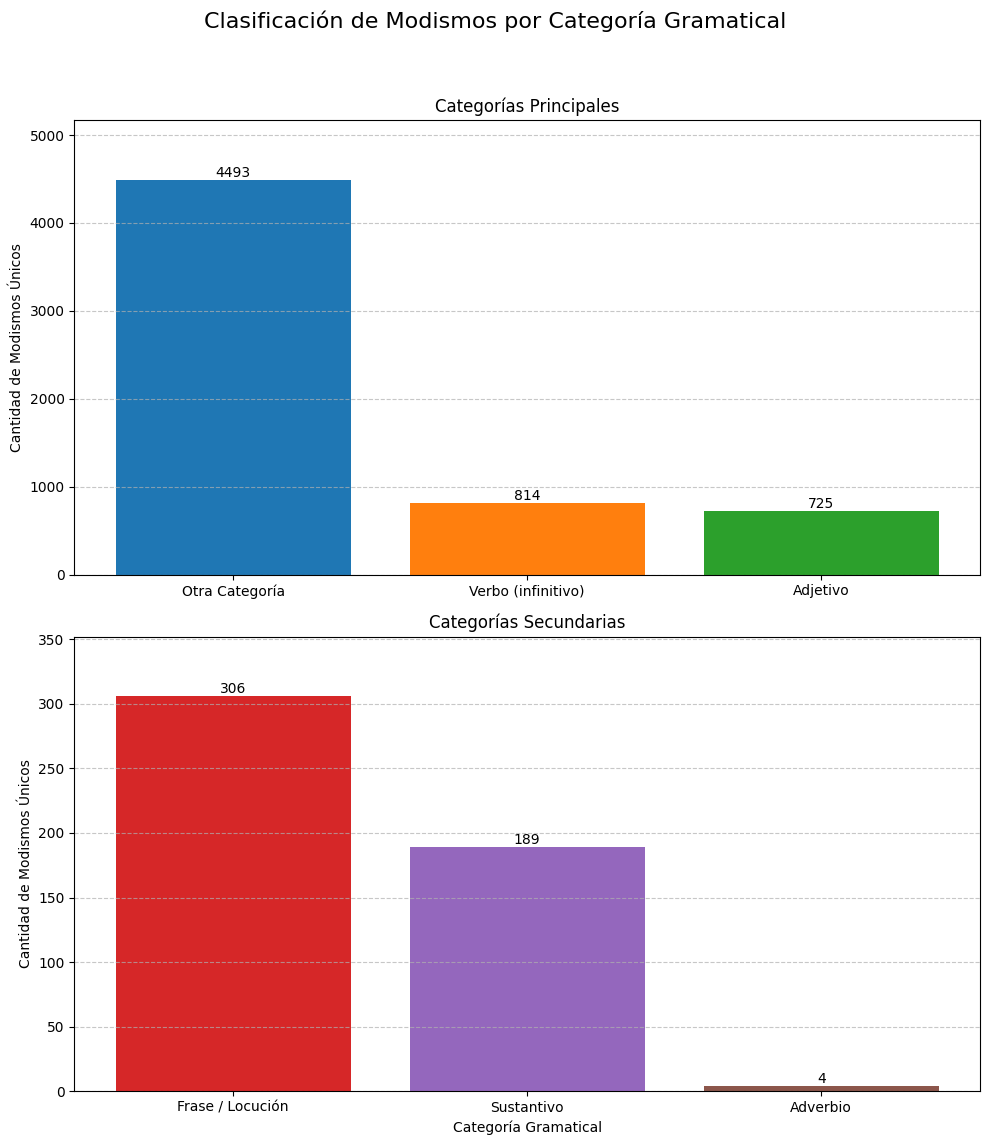

In [65]:
def classify_idiom_grammatically(idiom):
    """Clasifica un modismo en una categoría gramatical basada en su terminación."""
    # Prioridad 1: Frases compuestas
    if ' ' in idiom:
        return 'Frase / Locución'
    # Prioridad 2: Verbos en infinitivo (terminación más específica)
    if re.search(r'(ar|er|ir)$', idiom):
        return 'Verbo (infinitivo)'
    # Prioridad 3: Adverbios terminados en -mente
    if re.search(r'mente$', idiom):
        return 'Adverbio'
    # Prioridad 4: Adjetivos con terminaciones comunes
    if re.search(r'(ado|ada|ido|ida|oso|osa|ble|al)$', idiom):
        return 'Adjetivo'
    # Prioridad 5: Sustantivos con terminaciones comunes
    if re.search(r'(ión|dad|tad|ncia|or|ora)$', idiom):
        return 'Sustantivo'
    # Categoría por defecto
    return 'Otra Categoría'

# Obtener una lista de modismos únicos
unique_idioms = df['modismo'].unique()

# Clasificar cada modismo único usando la función
grammatical_categories = [classify_idiom_grammatically(idiom) for idiom in unique_idioms]

# Contar las categorías
category_counts = pd.Series(grammatical_categories).value_counts()

# Dividir los datos en principales y secundarios
top_categories = category_counts.head(3)
remaining_categories = category_counts.tail(len(category_counts) - 3)

# Crear una figura con 2 subplots verticales (uno encima del otro)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
fig.suptitle('Clasificación de Modismos por Categoría Gramatical', fontsize=16)

# --- Gráfico Superior (Principales) ---
bars1 = axes[0].bar(top_categories.index, top_categories.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('Categorías Principales')
axes[0].set_ylabel('Cantidad de Modismos Únicos')
axes[0].set_ylim(0, top_categories.max() * 1.15)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

# --- Gráfico Inferior (Secundarias) ---
bars2 = axes[1].bar(remaining_categories.index, remaining_categories.values, color=['#d62728', '#9467bd', '#8c564b'])
axes[1].set_title('Categorías Secundarias')
axes[1].set_xlabel('Categoría Gramatical')
axes[1].set_ylabel('Cantidad de Modismos Únicos')
axes[1].set_ylim(0, remaining_categories.max() * 1.15)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

# Ajustar el layout para que no se solapen los títulos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Longitud de Significados y Ejemeplos para Análisis de Calidad

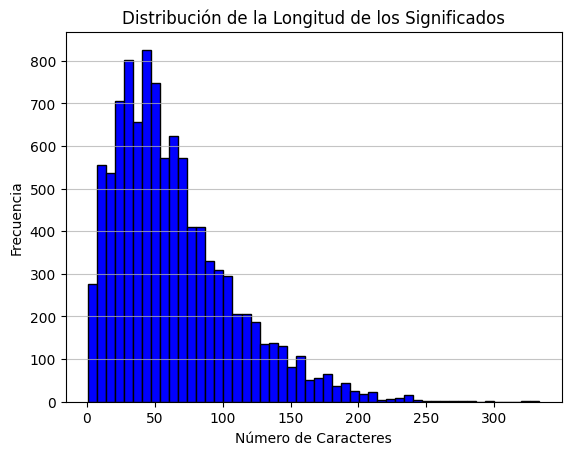

In [58]:
longitud_significados = df['significado'].str.len()

plt.hist(longitud_significados, bins=50, color='blue', edgecolor='black')
plt.title('Distribución de la Longitud de los Significados')
plt.xlabel('Número de Caracteres')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

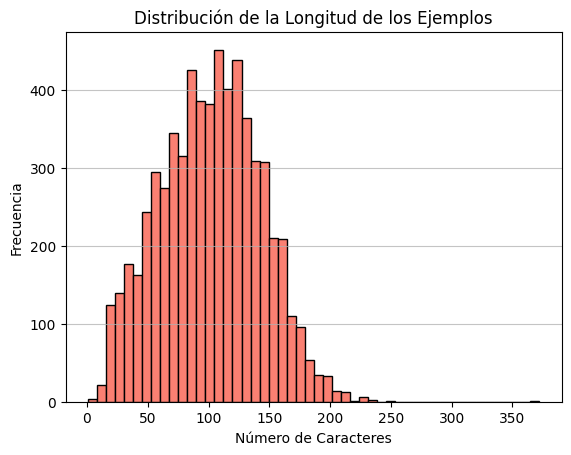

In [59]:
longitud_ejemplos = df['ejemplo'].str.len().dropna()

plt.hist(longitud_ejemplos, bins=50, color='salmon', edgecolor='black')
plt.title('Distribución de la Longitud de los Ejemplos')
plt.xlabel('Número de Caracteres')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()